In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['Price'] = boston_data.target
boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# split data
x, y = boston_data.data, boston_data.target 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                random_state = 0)

model = LinearRegression() 
model.fit(xtrain, ytrain)

y_pred = model.predict(xtest) 

In [4]:
# Results
print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R squared error', r2_score(ytest, y_pred))

Mean Absolute Error :  3.8429092204444983
Mean Square Error :  33.44897999767656
RMSE 5.783509315085138
R squared error 0.5892223849182504


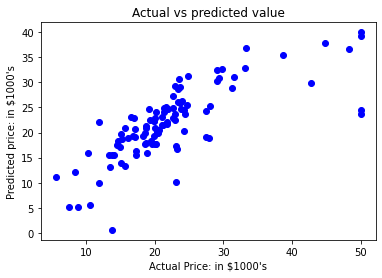

In [5]:
plt.scatter(ytest, y_pred, c = 'b') 
plt.title("Actual vs predicted value") 
plt.xlabel("Actual Price: in $1000's") 
plt.ylabel("Predicted price: in $1000's") 
plt.show() 

# Now Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.3)
clf.fit(xtrain, ytrain)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
# predicting the test set results 
y_pred2 = clf.predict(xtest) 

print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, y_pred2))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, y_pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, y_pred2)))
print('R squared error', r2_score(ytest, y_pred2))

Mean Absolute Error :  3.833302523389471
Mean Square Error :  33.736190768885855
RMSE 5.808286388332264
R squared error 0.5856952293627944


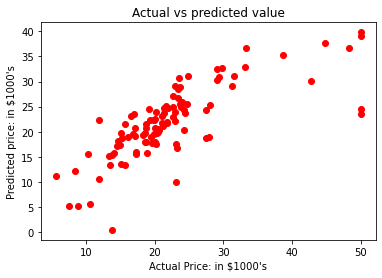

In [8]:
plt.scatter(ytest, y_pred2, c = 'r') 
plt.title("Actual vs predicted value") 
plt.xlabel("Actual Price: in $1000's") 
plt.ylabel("Predicted price: in $1000's") 
plt.show() 

# Lasso Regression

In [9]:
from sklearn import linear_model
lso = linear_model.Lasso(alpha=0.001)
lso.fit(xtrain, ytrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
# predicting the test set results 
y_pred2 = lso.predict(xtest) 

print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, y_pred2))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, y_pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, y_pred2)))
print('R squared error', r2_score(ytest, y_pred2))

Mean Absolute Error :  3.841681506908808
Mean Square Error :  33.4790181403956
RMSE 5.786105610891975
R squared error 0.5888534948466109


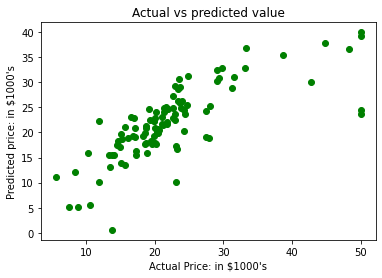

In [11]:
plt.scatter(ytest, y_pred2, c = 'g') 
plt.title("Actual vs predicted value") 
plt.xlabel("Actual Price: in $1000's") 
plt.ylabel("Predicted price: in $1000's") 
plt.show() 